In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image  # Import the Image module from Pillow
import pytesseract

In [6]:
# Load the model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('Model loaded successfully')


Model loaded successfully


In [7]:
def object_detection(path, model):
    # Load and preprocess the image
    image = load_img(path, target_size=(224, 224))
    image_arr_224 = img_to_array(image) / 255.0
    h, w, d = image_arr_224.shape
    test_arr = image_arr_224.reshape(1, 224, 224, 3)

    # Predict object coordinates
    coords = model.predict(test_arr)

    # Denormalize coordinates
    denorm = np.array([w, w, h, h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)

    # Create a copy of the image to draw rectangles on
    image_with_boxes = np.array(image)

    # Draw the rectangle on the image
    cv2.rectangle(image_with_boxes, pt1, pt2, (0, 255, 0), 3)

    # Extract ROI
    roi = image_arr_224[ymin:ymax, xmin:xmax]

    # Convert the NumPy array to a PIL image
    roi_pil = Image.fromarray((roi * 255).astype('uint8'))

    # Perform OCR on the ROI
    text = pytesseract.image_to_string(roi_pil)

    return image_with_boxes, coords, text


In [17]:
path = './test/Cars3.png'  # Update the path to your image
image, cods, text = object_detection(path, model)  # Provide the object detection model


1/1 [==============================] - 0s 157ms/step


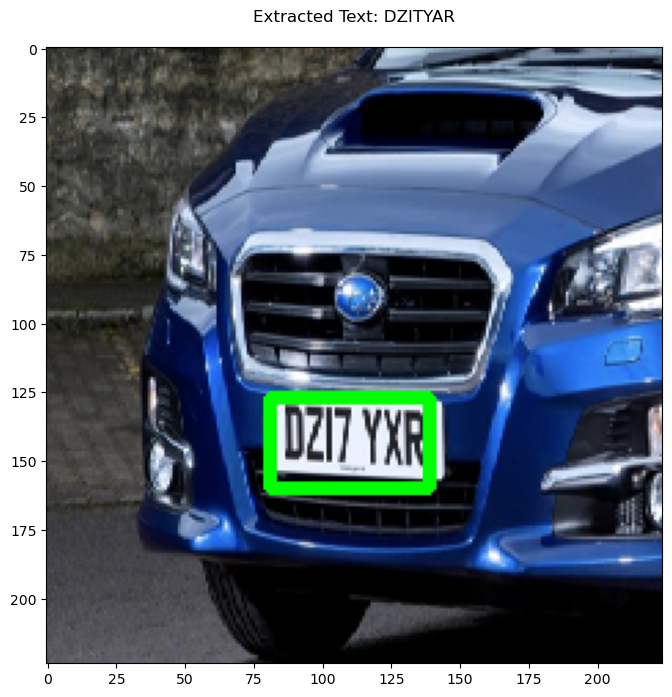

In [18]:
plt.figure(figsize=(10, 8))
plt.imshow(image)


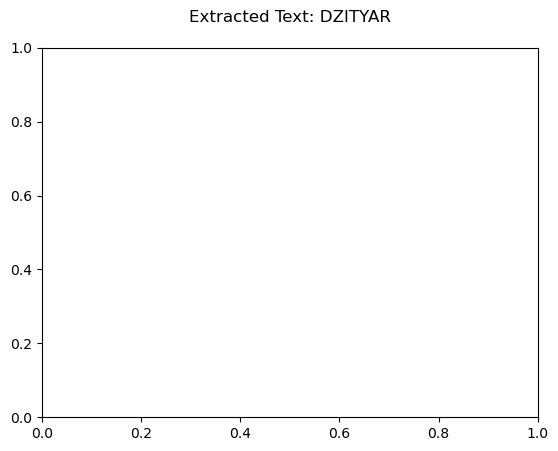

In [19]:
plt.title("Extracted Text: " + text)
plt.show()